# Model Evaluation and Selection for Classification

We will use different evaluation strategies for an imbalanced classification problem. We will use the digits dataset for this task and modify it to create an imbalanced dataset. We will also look at what dummy classifiers are and how they can be used to improve the model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
digits =load_digits()
X=digits.data
y=digits.target

for class_name, class_count in zip(digits.target_names,np.bincount(digits.target)):
  print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [ ]:
# Creating an imbalanced dataset
# Negative class (0) is 'not digit 1'
# Positive class (1) is 'digit 1'

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [ ]:
y_binary_imbalanced

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced,random_state=0)

from sklearn.svm import SVC

clf = SVC(kernel='rbf',C=1).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9955555555555555

In [ ]:
from sklearn.linear_model import LogisticRegression
lclf = LogisticRegression().fit(X_train,y_train)
lclf.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9688888888888889

In [ ]:
clfls = SVC(kernel='linear',C=1).fit(X_train,y_train)
clfls.score(X_test,y_test)

0.9777777777777777

## Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dclf= DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
dclf.score(X_test,y_test)

0.9044444444444445

In [ ]:
y_dummy_pred=dclf.predict(X_test)
y_dummy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for dummy classifier')
confusion_matrix(y_test,y_dummy_pred)

Confusion matrix for dummy classifier


array([[407,   0],
       [ 43,   0]])

In [ ]:
print('Confusion matrix for dummy classifier stratified')

dclf = DummyClassifier(strategy='stratified').fit(X_train,y_train)
y_pred=dclf.predict(X_test)
confusion_matrix(y_test,y_pred)

Confusion matrix for dummy classifier stratified


array([[368,  39],
       [ 39,   4]])

In [ ]:
print('SVM linear kernel')
y_pred_lins=clfls.predict(X_test)
confusion_matrix(y_test,y_pred_lins)

SVM linear kernel


array([[402,   5],
       [  5,  38]])

In [ ]:
print('SVM rbf kernel')
y_pred_rbf=clf.predict(X_test)
confusion_matrix(y_test,y_pred_rbf)

SVM rbf kernel


array([[407,   0],
       [  2,  41]])

In [ ]:
print('CM for Logistic Regression')
y_pred_log=lclf.predict(X_test)
confusion_matrix(y_test,y_pred_log)

CM for Logistic Regression


array([[401,   6],
       [  8,  35]])

In [ ]:
print('CM for Decision tree classifier')

from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
y_predict_dt=dtclf.predict(X_test)
confusion_matrix(y_test,y_predict_dt)

CM for Decision tree classifier


array([[400,   7],
       [ 17,  26]])

## Evaluation metrics for Binary Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
recall_score(y_test,y_dummy_pred)

0.0

In [ ]:
print('Decision Tree')
print('Accuracy: {:.2f}' .format(accuracy_score(y_test,y_predict_dt)))
print('Precision: {:.2f}' .format(precision_score(y_test,y_predict_dt)))
print('Recall: {:.2f}' .format(recall_score(y_test,y_predict_dt)))
print('F1 score: {:.2f}' .format(f1_score(y_test,y_predict_dt)))

Decision Tree
Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1 score: 0.68


In [ ]:
print('Decision Tree Classification Report')
print(classification_report(y_test,y_predict_dt, target_names=['not 1', '1']))

Decision Tree Classification Report
              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



Similarly, the classification report for all other classifiers can be generated

## Decision Function

It is a measure of how confidently a model predicts a particular class

In [ ]:
print('Decision function for logistic Regression classifier on the Imbalanced Digits dataset ')
y_scores = lclf.decision_function(X_test)

y_score_list = list(zip(y_test[0:20], y_scores[0:20]))
y_score_list

Decision function for logistic Regression classifier on the Imbalanced Digits dataset 


[(0, -29.82878328087822),
 (0, -19.38288583307711),
 (0, -29.198432998384995),
 (0, -21.746245538875527),
 (0, -22.642384612784937),
 (0, -11.805960521881941),
 (1, 6.4960108327232025),
 (0, -23.354598022530347),
 (0, -27.54368035714437),
 (0, -26.888214744475864),
 (0, -31.862868620542503),
 (0, -22.486099276049895),
 (0, -25.318017965537102),
 (0, -13.384535017654057),
 (0, -13.565630801384577),
 (0, -13.30837101312283),
 (1, 12.180881034226974),
 (0, -34.36245353298022),
 (0, -13.23152929186738),
 (0, -29.59396551427858)]

Predict proba

In [ ]:
y_prob_score=lclf.predict_proba(X_test)
y_prob_list=list(zip(y_test[0:20],y_prob_score[0:20]))
y_prob_list

[(0, array([1.00000000e+00, 1.11051395e-13])),
 (0, array([9.99999996e-01, 3.82049502e-09])),
 (0, array([1.00000000e+00, 2.08584325e-13])),
 (0, array([1.00000000e+00, 3.59522074e-10])),
 (0, array([1.00000000e+00, 1.46736213e-10])),
 (0, array([9.99992540e-01, 7.45990423e-06])),
 (1, array([0.00150717, 0.99849283])),
 (0, array([1.00000000e+00, 7.19825043e-11])),
 (0, array([1.00000000e+00, 1.09126848e-12])),
 (0, array([1.00000000e+00, 2.10182575e-12])),
 (0, array([1.00000000e+00, 1.45255298e-14])),
 (0, array([1.00000000e+00, 1.71558075e-10])),
 (0, array([1.00000000e+00, 1.01047251e-11])),
 (0, array([9.99998461e-01, 1.53875554e-06])),
 (0, array([9.99998716e-01, 1.28386938e-06])),
 (0, array([9.99998339e-01, 1.66053175e-06])),
 (1, array([5.12753171e-06, 9.99994872e-01])),
 (0, array([1.00000000e+00, 1.19282311e-15])),
 (0, array([9.99998207e-01, 1.79316008e-06])),
 (0, array([1.00000000e+00, 1.40444288e-13]))]

## Precision Recall curve

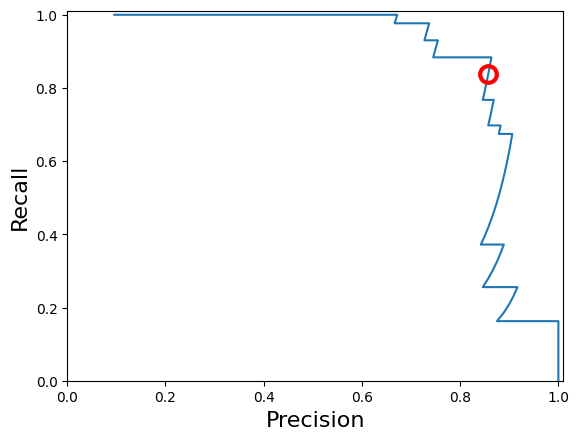

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()

Text(0, 0.5, 'Recall')

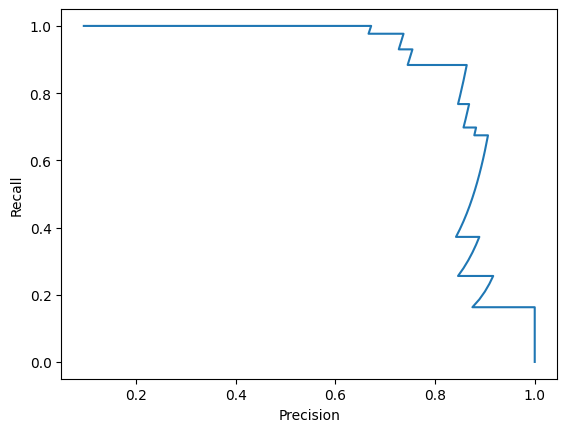

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test,y_scores)

plt.figure()
plt.plot(precision,recall,label='Precision Recall curve')
plt.xlabel('Precision',fontsize=10)
plt.ylabel('Recall',fontsize=10)

## ROC and AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

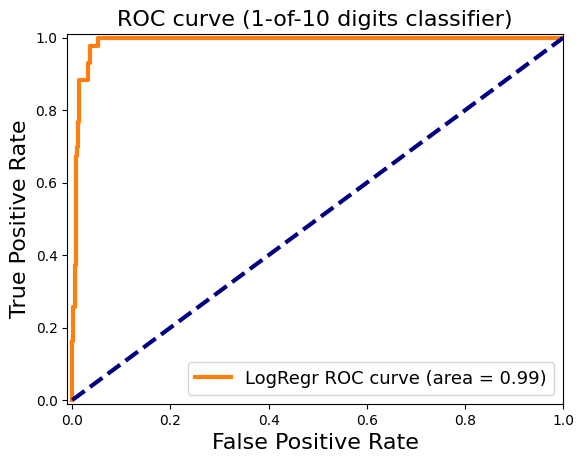

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr,tpr_lr)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')